# Постановка задачи:

Решить с помощью метода прогонки (подразумевается только трехточечная) следующие СЛАУ $A_i \mathbf{b}=\mathbf{f}_i$:

СЛАУ, получающуюся при построении кубического сплайна для функции $f(x)=x|\cos (5 x)|$ на отрезке $x \in[0,2]$ по значениям в $N=100$ узлах $x_i=2 i / N$

и

$
\begin{aligned}
& A_2=\left(\begin{array}{ccccccccccc}
1 & 0 & 0 & 0 & 0 & 0 & 0 & \ldots & 0 & 0 & 0 \\
-1 & 1 & 0 & 0 & 0 & 0 & 0 & \ldots & 0 & 0 & 0 \\
1 & -4 & 6 & -4 & 1 & 0 & 0 & \ldots & 0 & 0 & 0 \\
0 & 1 & -4 & 6 & -4 & 1 & 0 & \ldots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \ldots & 6 & -4 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \ldots & 0 & -1 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \ldots & 0 & 0 & 1
\end{array}\right) \in \mathbb{R}^{(n+1) \times (n+1)}\\
\end{aligned}
$

$\begin{aligned} & \left(\mathbf{f}_2\right)_l=\cos \left(x_l\right) * h^4, \quad x_l=\frac{l \pi}{n}, \quad h=\frac{\pi}{n}, \quad l=\overline{2, n-2} \\ & \left(\mathbf{f}_2\right)_0=\left(\mathbf{f}_2\right)_n=1, \quad\left(\mathbf{f}_2\right)_1=\left(\mathbf{f}_2\right)_{n-1}=0 \\ & n=100\end{aligned}$

In [ ]:
import math
import array
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [ ]:
def tridiagonal_solver(a, b, c, r):
    n = len(r)
    beta = []
    rho = []
    beta.append(b[0])
    rho.append(r[0])

    for j in range(1, n):
        beta.append(b[j] - a[j-1]*c[j-1]/beta[j-1])
        rho.append(r[j] - a[j-1]*rho[j-1]/beta[j-1])

    x = array.array('f', [0]*n)
    x[n-1] = rho[n-1] / beta[n-1]
    for j in range(1, n-1):
        x[n-j-1] = (rho[n-j-1] - c[n-j-1]*x[n-j]) / beta[n-j-1]

    return x

<ipython-input-59-0fd314b390c2>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('cool', N)


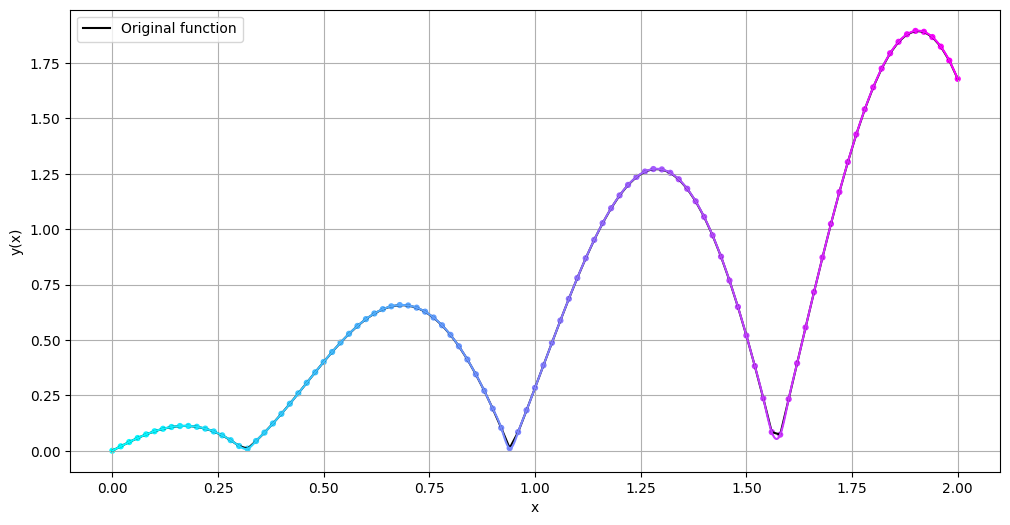

In [ ]:
N = 100
x = [2*i/N for i in range(0, N+1)]
y = [x[i] * abs(math.cos(5*x[i])) for i in range(0, N+1)]
h = [x[i] - x[i-1] for i in range(1, N+1)]

# tridiagonal matrix
diag_1 = [0] + [h[i] for i in range(2, N-1)] + [0]
diag_2 = [1] + [2*(h[i] + h[i+1]) for i in range(1, N-1)] + [1]

f = [0] + [6*((y[i+2] - y[i+1])/h[i+1] - (y[i+1] - y[i])/h[i]) for i in range(1, N-1)] + [0]

# solve a system
ssd = tridiagonal_solver(diag_1, diag_2, diag_1, f)
ssd = np.insert(ssd, 0, 0)

a, b, c, d = [], [], [], []
for j in range(0, N):
    d.append(y[j])
    c.append((y[j+1] - y[j])/h[j] - ((h[j]*ssd[j+1] + 2*h[j]*ssd[j])/6))
    b.append(ssd[j]/2)
    a.append((ssd[j+1] - ssd[j])/(6*h[j]))

# draw a plot of function and its interpolant
fig, ax = plt.subplots(figsize=(12, 6))
colors = plt.cm.get_cmap('cool', N)

plt.plot(x, y, label='Original function', color='black')

for i in range(N+1):
    plt.scatter(x[i], y[i], s=20, c=[colors(i)], edgecolors='none')

for i in range(0, N):
    xs = np.linspace(x[i], x[i+1], N)
    ys = a[i]*(xs - x[i])**3 + b[i]*(xs - x[i])**2 + c[i]*(xs - x[i]) + d[i]
    plt.plot(xs, ys, color=colors(i))

plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
def prod(A, b):
    result = []
    for row in A:
        row_sum = 0
        for j in range(len(b)):
            row_sum += row[j] * b[j]
        result.append(row_sum)
    return result

def l2_norm(vec):
    sum = 0
    for coord in vec:
        sum += coord ** 2
    return sum ** 0.5

def norm_residual(A, B, f):
    res = prod(A, B)
    for i in range(len(res)):
        res[i] -= f[i]
    norm_res = l2_norm(res)
    return norm_res

In [ ]:
A = np.diag(diag_1, -1) + np.diag(diag_2, 0) + np.diag(diag_1, 1)

print(A)
print(f)

# calculate the residual
norm_res = norm_residual(A, ssd[1:], f)
print(norm_res)

[[1.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.08 0.02 ... 0.   0.   0.  ]
 [0.   0.02 0.08 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.08 0.02 0.  ]
 [0.   0.   0.   ... 0.02 0.08 0.  ]
 [0.   0.   0.   ... 0.   0.   1.  ]]
[0, -0.3555160722607371, -0.5258508183576713, -0.6873940511663965, -0.8374077206047013, -0.9733155508371474, -1.0927395464846625, -1.1935339447634883, -1.2738161724794337, -1.3319944034727895, -1.3667913537673226, -1.377263997835077, -1.3628189394948962, -1.3232232244294044, 4.347697844357452, 13.902178286389333, 1.05670353149007, 0.9214965868761182, 0.7654253676317069, 0.5903790307072914, 0.39854950419859847, 0.19240516078652892, -0.02533935758652106, -0.2517568072228933, -0.48374410058498185, -0.7180617123075876, -0.9513752556374468, -1.1802987218765115, -1.4014388516427685, -1.6114400893015954, -1.807029560987171, -1.9850615123999862, -2.142560645107881, -2.276763799397586, -2.385159447748603, -2.4655244855737983, -2.5159578347582956, -2.534910410430788, -2.5

In [ ]:
def gaussian_elimination(A, b):
    n = len(A)

    for i in range(n):
        for j in range(i+1, n):
            factor = A[j][i] / A[i][i]
            for k in range(i, n):
                A[j][k] -= factor * A[i][k]
            b[j] -= factor * b[i]

    x = [0] * n
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - sum(A[i][j] * x[j] for j in range(i+1, n))) / A[i][i]

    return x

In [ ]:
n = 100

# create matrix A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[1, 0] = -1
A[1, 1] = 1
for i in range(2, n-1):
    A[i, i-2 : i+3] = [1, -4, 6, -4, 1]
A[n-1, n-1] = -1
A[n-1, n] = 1
A[n, n] = 1

# create vector f
f = [1, 0]
h = math.pi/n
for l in range(2, n-1):
    f.append(math.cos(l*h) * h**4)
f.extend([0, 1])
f = np.array(f)

# solve a system
print(A)
print(f)
x = gaussian_elimination(A, f)
print(x)

# calculate the residual
norm_res = norm_residual(A, x, f)
print(norm_res)

[[ 1.  0.  0. ...  0.  0.  0.]
 [-1.  1.  0. ...  0.  0.  0.]
 [ 1. -4.  6. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  6. -4.  1.]
 [ 0.  0.  0. ...  0. -1.  1.]
 [ 0.  0.  0. ...  0.  0.  1.]]
[ 1.00000000e+00  0.00000000e+00  9.72168764e-07  9.69767860e-07
  9.66409913e-07  9.62098235e-07  9.56837082e-07  9.50631647e-07
  9.43488053e-07  9.35413350e-07  9.26415508e-07  9.16503405e-07
  9.05686824e-07  8.93976439e-07  8.81383807e-07  8.67921356e-07
  8.53602372e-07  8.38440985e-07  8.22452158e-07  8.05651670e-07
  7.88056101e-07  7.69682815e-07  7.50549946e-07  7.30676375e-07
  7.10081714e-07  6.88786288e-07  6.66811114e-07  6.44177877e-07
  6.20908914e-07  5.97027190e-07  5.72556271e-07  5.47520309e-07
  5.21944011e-07  4.95852616e-07  4.69271875e-07  4.42228019e-07
  4.14747738e-07  3.86858150e-07  3.58586781e-07  3.29961529e-07
  3.01010645e-07  2.71762700e-07  2.42246559e-07  2.12491349e-07
  1.82526435e-07  1.52381390e-07  1.22085964e-07  9.16700526e-08
  6.11636743e-08  3.05969349